# NYC Education Data - Deep Dive Analysis

**Dataset:** NYC School SAT Scores + Demographics  
**Schools:** 460 with SAT scores, 440 with demographics  
**Created:** October 6, 2025

## Objectives
1. Explore SAT score distributions
2. Analyze performance by borough
3. Merge demographics with performance
4. Find correlations and insights
5. Build visualizations

In [1]:
# Setup - Import libraries
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
sys.path.append(str(project_root))

from scripts.utils import load_csv, save_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")
print(f"📁 Project root: {project_root}")

✅ Libraries imported successfully!
📁 Project root: c:\git\dbt


## 1. Load and Explore SAT Scores

In [2]:
# Load SAT scores
sat = load_csv("zt9s-n5aj_20251006_114228.csv")

print(f"📊 SAT Scores Dataset")
print(f"Shape: {sat.shape}")
print(f"\nColumns: {list(sat.columns)}")
print(f"\nFirst few rows:")
sat.head()

📊 SAT Scores Dataset
Shape: (460, 6)

Columns: ['dbn', 'school_name', 'number_of_test_takers', 'critical_reading_mean', 'mathematics_mean', 'writing_mean']

First few rows:


,dbn,school_name,number_of_test_takers,critical_reading_mean,mathematics_mean,writing_mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN


In [3]:
# Data types and missing values
print("📋 Data Info:")
print(sat.info())
print(f"\n❓ Missing Values:")
print(sat.isnull().sum())

📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dbn                    460 non-null    object 
 1   school_name            460 non-null    object 
 2   number_of_test_takers  386 non-null    float64
 3   critical_reading_mean  386 non-null    float64
 4   mathematics_mean       386 non-null    float64
 5   writing_mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.7+ KB
None

❓ Missing Values:
dbn                       0
school_name               0
number_of_test_takers    74
critical_reading_mean    74
mathematics_mean         74
writing_mean             74
dtype: int64


In [4]:
# Convert scores to numeric
score_columns = ['mathematics_mean', 'critical_reading_mean', 'writing_mean', 'number_of_test_takers']

for col in score_columns:
    sat[col] = pd.to_numeric(sat[col], errors='coerce')

# Calculate total SAT score
sat['total_score'] = sat['mathematics_mean'] + sat['critical_reading_mean'] + sat['writing_mean']

# Calculate average score per student
sat['avg_score_per_section'] = sat['total_score'] / 3

print("✅ Scores converted to numeric and total calculated")
sat[['school_name', 'mathematics_mean', 'critical_reading_mean', 'writing_mean', 'total_score']].head(10)

✅ Scores converted to numeric and total calculated


,school_name,mathematics_mean,critical_reading_mean,writing_mean,total_score
0,Henry Street School for International Studies,425.0,391.0,385.0,1201.0
1,University Neighborhood High School,419.0,394.0,387.0,1200.0
2,East Side Community High School,431.0,418.0,402.0,1251.0
3,SATELLITE ACADEMY FORSYTH ST,370.0,385.0,378.0,1133.0
4,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
5,Lower East Side Preparatory High School,532.0,314.0,314.0,1160.0
6,"New Explorations into Sci, Tech and Math HS",583.0,568.0,568.0,1719.0
7,CASCADES HIGH SCHOOL,401.0,411.0,401.0,1213.0
8,BARD HIGH SCHOOL EARLY COLLEGE,608.0,630.0,630.0,1868.0
9,AMERICAN SIGN LANG ENG DUAL,415.0,405.0,385.0,1205.0


## 2. Statistical Summary

In [5]:
# Descriptive statistics
print("📊 SAT Score Statistics:\n")
print(sat[['mathematics_mean', 'critical_reading_mean', 'writing_mean', 'total_score', 'number_of_test_takers']].describe())

📊 SAT Score Statistics:

       mathematics_mean  critical_reading_mean  writing_mean  total_score  \
count        386.000000             386.000000    386.000000   386.000000   
mean         412.935233             404.248705    397.689119  1214.873057   
std           64.990976              56.815631     57.762584   174.903304   
min          281.000000             291.000000    285.000000   914.000000   
25%          372.000000             370.000000    364.000000  1109.000000   
50%          394.500000             392.500000    383.000000  1170.000000   
75%          429.750000             419.000000    414.000000  1258.750000   
max          735.000000             674.000000    678.000000  2087.000000   

       number_of_test_takers  
count             386.000000  
mean              103.658031  
std               145.264496  
min                 7.000000  
25%                35.000000  
50%                54.000000  
75%                92.750000  
max              1047.000000  


In [6]:
# Key insights
print("🎯 Key Insights:\n")
print(f"Average Math Score: {sat['mathematics_mean'].mean():.0f}")
print(f"Average Reading Score: {sat['critical_reading_mean'].mean():.0f}")
print(f"Average Writing Score: {sat['writing_mean'].mean():.0f}")
print(f"Average Total SAT: {sat['total_score'].mean():.0f}")
print(f"\nHighest Total Score: {sat['total_score'].max():.0f}")
print(f"Lowest Total Score: {sat['total_score'].min():.0f}")
print(f"Score Range: {sat['total_score'].max() - sat['total_score'].min():.0f} points")
print(f"\nMedian Total Score: {sat['total_score'].median():.0f}")
print(f"Standard Deviation: {sat['total_score'].std():.0f}")

🎯 Key Insights:

Average Math Score: 413
Average Reading Score: 404
Average Writing Score: 398
Average Total SAT: 1215

Highest Total Score: 2087
Lowest Total Score: 914
Score Range: 1173 points

Median Total Score: 1170
Standard Deviation: 175


## 3. Top and Bottom Performers

In [7]:
# Top 10 schools
print("🏆 TOP 10 SCHOOLS BY TOTAL SAT SCORE:\n")
top_10 = sat.nlargest(10, 'total_score')[['school_name', 'mathematics_mean', 'critical_reading_mean', 'writing_mean', 'total_score']]
for idx, row in top_10.iterrows():
    print(f"{row['school_name'][:50]:50s} - {row['total_score']:.0f}")
    print(f"  Math: {row['mathematics_mean']:.0f}, Reading: {row['critical_reading_mean']:.0f}, Writing: {row['writing_mean']:.0f}")
    print()

🏆 TOP 10 SCHOOLS BY TOTAL SAT SCORE:

STUYVESANT HIGH SCHOOL                             - 2087
  Math: 735, Reading: 674, Writing: 678

BRONX HIGH SCHOOL OF SCIENCE                       - 1960
  Math: 685, Reading: 632, Writing: 643

STATEN ISLAND TECHNICAL HIGH SCHOOL                - 1928
  Math: 673, Reading: 638, Writing: 617

Townsend Harris High School at Queens College      - 1923
  Math: 644, Reading: 637, Writing: 642

HS of American Studies at Lehman College           - 1884
  Math: 630, Reading: 635, Writing: 619

QUEENS HS FOR SCIENCE YORK COL                     - 1875
  Math: 650, Reading: 613, Writing: 612

BARD HIGH SCHOOL EARLY COLLEGE                     - 1868
  Math: 608, Reading: 630, Writing: 630

BROOKLYN TECHNICAL HIGH SCHOOL                     - 1821
  Math: 652, Reading: 588, Writing: 581

High School For Math Science Engineering City Coll - 1794
  Math: 627, Reading: 592, Writing: 575

New York City Laboratory School Collab Studies     - 1725
  Math: 597, 

In [8]:
# Bottom 10 schools (to identify schools needing support)
print("📉 SCHOOLS WITH LOWEST TOTAL SAT SCORES:\n")
bottom_10 = sat.nsmallest(10, 'total_score')[['school_name', 'total_score']]
for idx, row in bottom_10.iterrows():
    print(f"{row['school_name'][:50]:50s} - {row['total_score']:.0f}")

📉 SCHOOLS WITH LOWEST TOTAL SAT SCORES:

Brooklyn High Sch for Leadership Community Svc     - 914
HIGH SCHOOL OF WORLD CULTURES                      - 915
Kingsbridge International High School              - 925
International School of Liberal Arts               - 954
International High School @Prospect Hgt            - 966
INTERNATIONAL COMMUNITY HIGH SCHOOL                - 984
Fannie Lou Hamer Freedom High School               - 989
EVANDER CHILDS HIGH SCHOOL                         - 1000
SAMUEL J TILDEN HIGH SCHOOL                        - 1007
LAFAYETTE HIGH SCHOOL                              - 1009


## 4. Score Distribution Visualizations

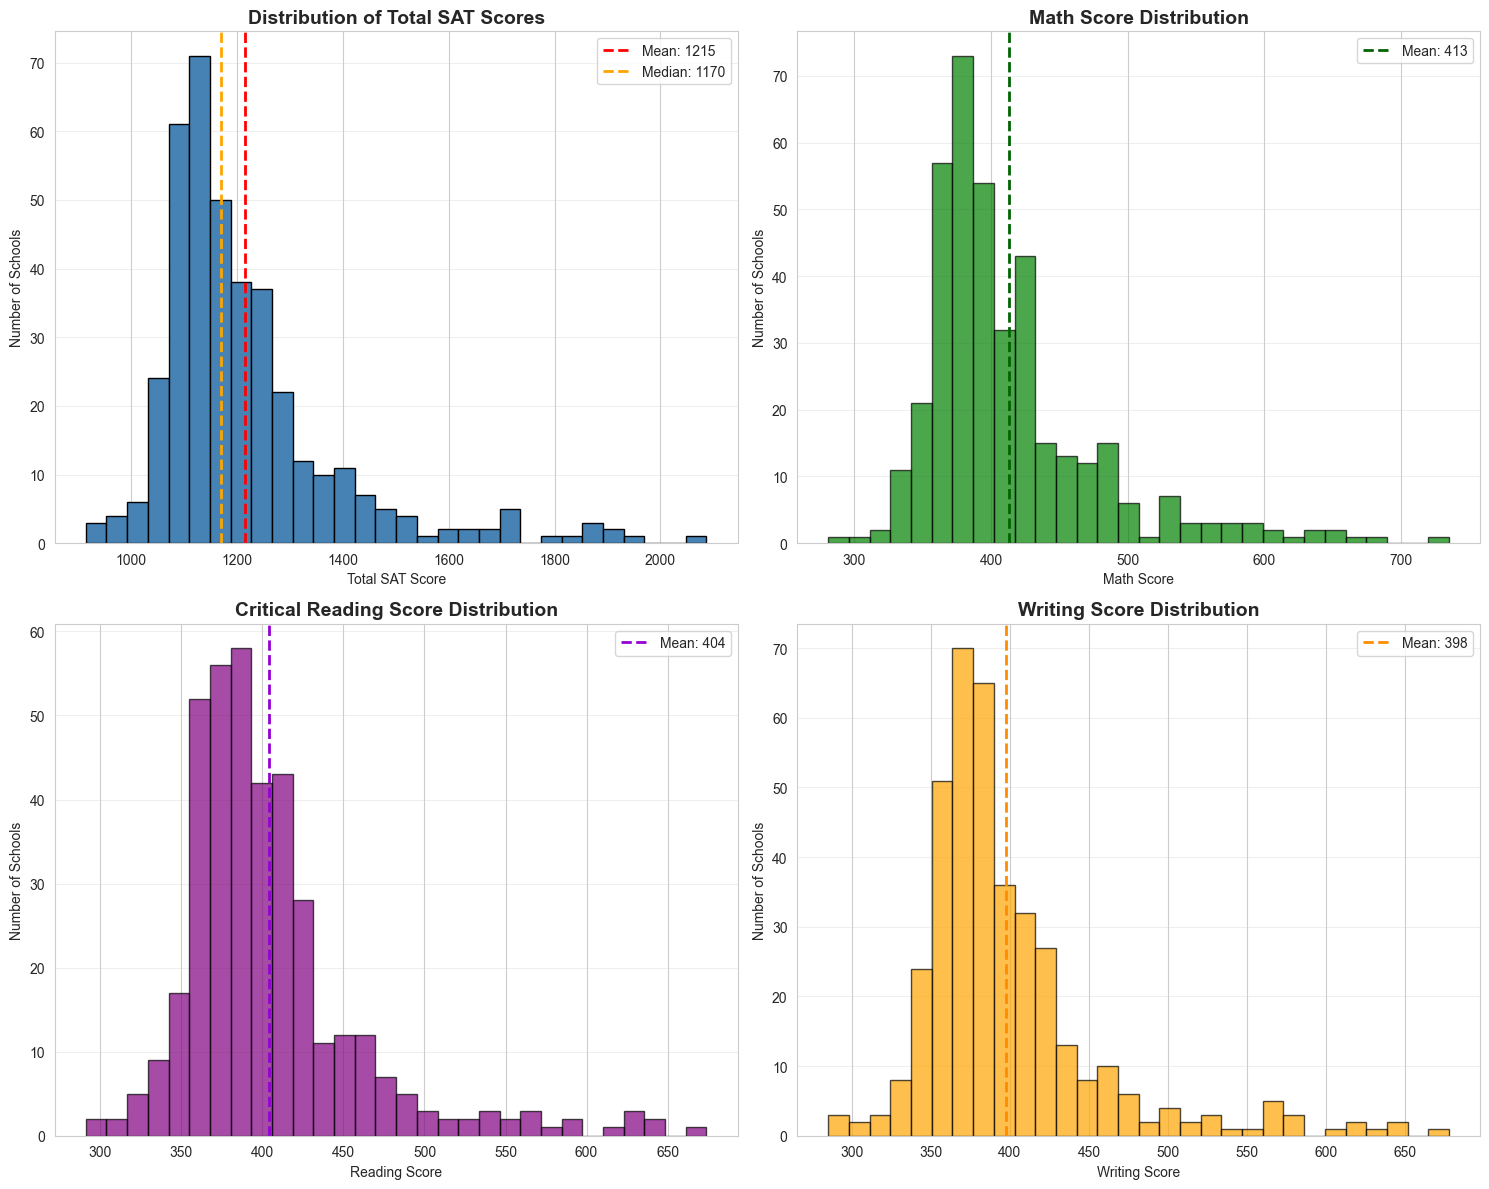

In [9]:
# Distribution of total SAT scores
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Total score distribution
axes[0, 0].hist(sat['total_score'].dropna(), bins=30, color='steelblue', edgecolor='black')
axes[0, 0].axvline(sat['total_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sat["total_score"].mean():.0f}')
axes[0, 0].axvline(sat['total_score'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {sat["total_score"].median():.0f}')
axes[0, 0].set_xlabel('Total SAT Score')
axes[0, 0].set_ylabel('Number of Schools')
axes[0, 0].set_title('Distribution of Total SAT Scores', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Math scores
axes[0, 1].hist(sat['mathematics_mean'].dropna(), bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(sat['mathematics_mean'].mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {sat["mathematics_mean"].mean():.0f}')
axes[0, 1].set_xlabel('Math Score')
axes[0, 1].set_ylabel('Number of Schools')
axes[0, 1].set_title('Math Score Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Reading scores
axes[1, 0].hist(sat['critical_reading_mean'].dropna(), bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(sat['critical_reading_mean'].mean(), color='darkviolet', linestyle='--', linewidth=2, label=f'Mean: {sat["critical_reading_mean"].mean():.0f}')
axes[1, 0].set_xlabel('Reading Score')
axes[1, 0].set_ylabel('Number of Schools')
axes[1, 0].set_title('Critical Reading Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Writing scores
axes[1, 1].hist(sat['writing_mean'].dropna(), bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(sat['writing_mean'].mean(), color='darkorange', linestyle='--', linewidth=2, label=f'Mean: {sat["writing_mean"].mean():.0f}')
axes[1, 1].set_xlabel('Writing Score')
axes[1, 1].set_ylabel('Number of Schools')
axes[1, 1].set_title('Writing Score Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

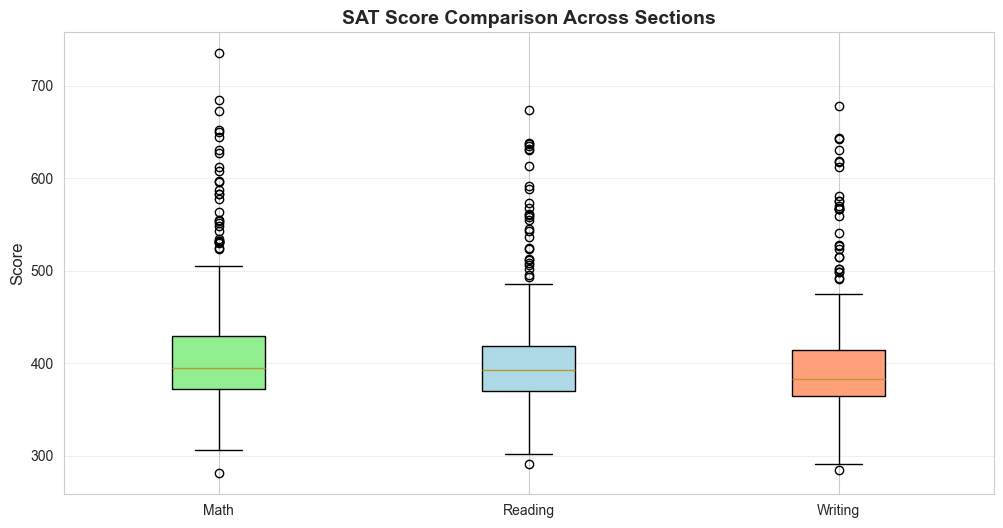


📊 Score Comparison:
Math has highest average
Writing has lowest average


In [10]:
# Box plots for score comparison
fig, ax = plt.subplots(figsize=(12, 6))

score_data = [
    sat['mathematics_mean'].dropna(),
    sat['critical_reading_mean'].dropna(),
    sat['writing_mean'].dropna()
]

bp = ax.boxplot(score_data, labels=['Math', 'Reading', 'Writing'], patch_artist=True)

# Color the boxes
colors = ['lightgreen', 'lightblue', 'lightsalmon']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('SAT Score Comparison Across Sections', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.show()

print("\n📊 Score Comparison:")
print(f"Math has {'highest' if sat['mathematics_mean'].mean() > sat['critical_reading_mean'].mean() and sat['mathematics_mean'].mean() > sat['writing_mean'].mean() else 'lower'} average")
print(f"Writing has {'lowest' if sat['writing_mean'].mean() < sat['critical_reading_mean'].mean() and sat['writing_mean'].mean() < sat['mathematics_mean'].mean() else 'higher'} average")

## 5. Load and Merge Demographics Data

In [11]:
# Load demographics
demo = load_csv("s3k6-pzi2_20251006_114239.csv")

print(f"🏫 Demographics Dataset")
print(f"Shape: {demo.shape}")
print(f"Total Columns: {len(demo.columns)}")
print(f"\nKey columns available: {demo.columns.tolist()[:20]}...")
demo.head(3)

🏫 Demographics Dataset
Shape: (440, 343)
Total Columns: 343

Key columns available: ['dbn', 'school_name', 'boro', 'overview_paragraph', 'school_10th_seats', 'academicopportunities1', 'academicopportunities2', 'ell_programs', 'neighborhood', 'building_code', 'location', 'phone_number', 'fax_number', 'school_email', 'website', 'subway', 'bus', 'grades2018', 'finalgrades', 'total_students']...


,dbn,school_name,boro,overview_paragraph,school_10th_seats,academicopportunities1,academicopportunities2,ell_programs,neighborhood,building_code,location,phone_number,fax_number,school_email,website,subway,bus,grades2018,finalgrades,total_students,extracurricular_activities,school_sports,attendance_rate,pct_stu_enough_variety,pct_stu_safe,...,grade9swdapplicantsperseat10,admissionspriority43,directions5,directions6,requirement5_6,seats2specialized,seats3specialized,seats4specialized,seats5specialized,seats6specialized,applicants2specialized,applicants3specialized,applicants4specialized,applicants5specialized,applicants6specialized,appperseat2specialized,appperseat3specialized,appperseat4specialized,appperseat5specialized,appperseat6specialized,admissionspriority53,admissionspriority62,admissionspriority63,requirement5_7,requirement6_7
0,02M260,"Clinton School Writers & Artists, M.S. 260",M,Students who are prepared for college must hav...,1.0,Free college courses at neighboring universities,"International Travel, Special Arts Programs, M...",English as a New Language,Chelsea-Union Sq,M868,"10 East 15th Street, Manhattan NY 10003 (40.73...",212-524-4360,212-524-4365,admissions@theclintonschool.net,www.theclintonschool.net,"1, 2, 3, F, M to 14th St - 6th Ave; 4, 5, L, Q...","BM1, BM2, BM3, BM4, BxM10, BxM6, BxM7, BxM8, B...",6-11,6-12,376,"CUNY College Now, Technology, Model UN, Studen...","Cross Country, Track and Field, Soccer, Flag F...",0.97,0.90,0.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21K728,Liberation Diploma Plus High School,K,The mission of Liberation Diploma Plus High Sc...,1.0,"Learning to Work, Student Council, Advisory Le...","CAMBA, Diploma Plus, Medgar Evers College, Con...",English as a New Language,Seagate-Coney Island,K728,"2865 West 19th Street, Brooklyn, NY 11224 (40....",718-946-6812,718-946-6825,scaraway@schools.nyc.gov,schools.nyc.gov/schoolportals/21/K728,"D, F, N, Q to Coney Island Â– S llwell Avenue","B36, B64, B68, B74, B82, X28, X38","School is structured on credit needs, not grad...","School is structured on credit needs, not grad...",206,"Advisory Leadership, Student Council, Communit...",Basketball,0.55,0.90,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08X282,Women's Academy of Excellence,X,The WomenÂ’s Academy of Excellence is an all-g...,NaN,"Genetic Research Seminar, Touro College Partne...","WAE Bucks Incentive Program, Monroe College Ju...",English as a New Language,Castle Hill-Clason Point,X174,"456 White Plains Road, Bronx NY 10473 (40.8150...",718-542-0740,718-542-0841,sburns@schools.nyc.gov,schools.nyc.gov/SchoolPortals/08/X282,NaN,"Bx22, Bx27, Bx36, Bx39, Bx5",9-12,9-12,338,"Academy of Health, Advisory, Annual Breast Can...",NaN,0.79,0.33,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Merge datasets on DBN (school ID)
merged = sat.merge(demo[['dbn', 'boro', 'school_name']], on='dbn', how='left', suffixes=('', '_demo'))

print(f"✅ Merged Dataset")
print(f"Shape: {merged.shape}")
print(f"\nSchools with borough data: {merged['boro'].notna().sum()}")
print(f"Schools without borough data: {merged['boro'].isna().sum()}")

merged.head()

✅ Merged Dataset
Shape: (460, 10)

Schools with borough data: 335
Schools without borough data: 125


,dbn,school_name,number_of_test_takers,critical_reading_mean,mathematics_mean,writing_mean,total_score,avg_score_per_section,boro,school_name_demo
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0,400.333333,M,Orchard Collegiate Academy (Henry Street School)
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0,400.000000,M,University Neighborhood High School
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0,417.000000,M,East Side Community School
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0,377.666667,NaN,NaN
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN,NaN,NaN,M,Marta Valle High School


## 6. Borough Analysis

In [13]:
# Borough mapping
borough_names = {
    'M': 'Manhattan',
    'X': 'Bronx',
    'K': 'Brooklyn',
    'Q': 'Queens',
    'R': 'Staten Island'
}

merged['borough_name'] = merged['boro'].map(borough_names)

# Schools per borough
print("🗽 Schools by Borough:\n")
borough_counts = merged['borough_name'].value_counts()
for boro, count in borough_counts.items():
    print(f"{boro:15s}: {count:3d} schools ({count/len(merged)*100:.1f}%)")

🗽 Schools by Borough:

Brooklyn       : 101 schools (22.0%)
Bronx          :  85 schools (18.5%)
Manhattan      :  81 schools (17.6%)
Queens         :  59 schools (12.8%)
Staten Island  :   9 schools (2.0%)


In [14]:
# Average scores by borough
borough_scores = merged.groupby('borough_name').agg({
    'mathematics_mean': 'mean',
    'critical_reading_mean': 'mean',
    'writing_mean': 'mean',
    'total_score': 'mean',
    'number_of_test_takers': 'mean'
}).round(0)

borough_scores = borough_scores.sort_values('total_score', ascending=False)

print("\n📊 Average SAT Scores by Borough:\n")
print(borough_scores)


📊 Average SAT Scores by Borough:

               mathematics_mean  critical_reading_mean  writing_mean  \
borough_name                                                           
Staten Island             490.0                  473.0         465.0   
Queens                    453.0                  430.0         426.0   
Manhattan                 446.0                  432.0         426.0   
Brooklyn                  408.0                  400.0         394.0   
Bronx                     392.0                  388.0         382.0   

               total_score  number_of_test_takers  
borough_name                                       
Staten Island       1428.0                  318.0  
Queens              1309.0                  198.0  
Manhattan           1304.0                  102.0  
Brooklyn            1202.0                  122.0  
Bronx               1162.0                   72.0  


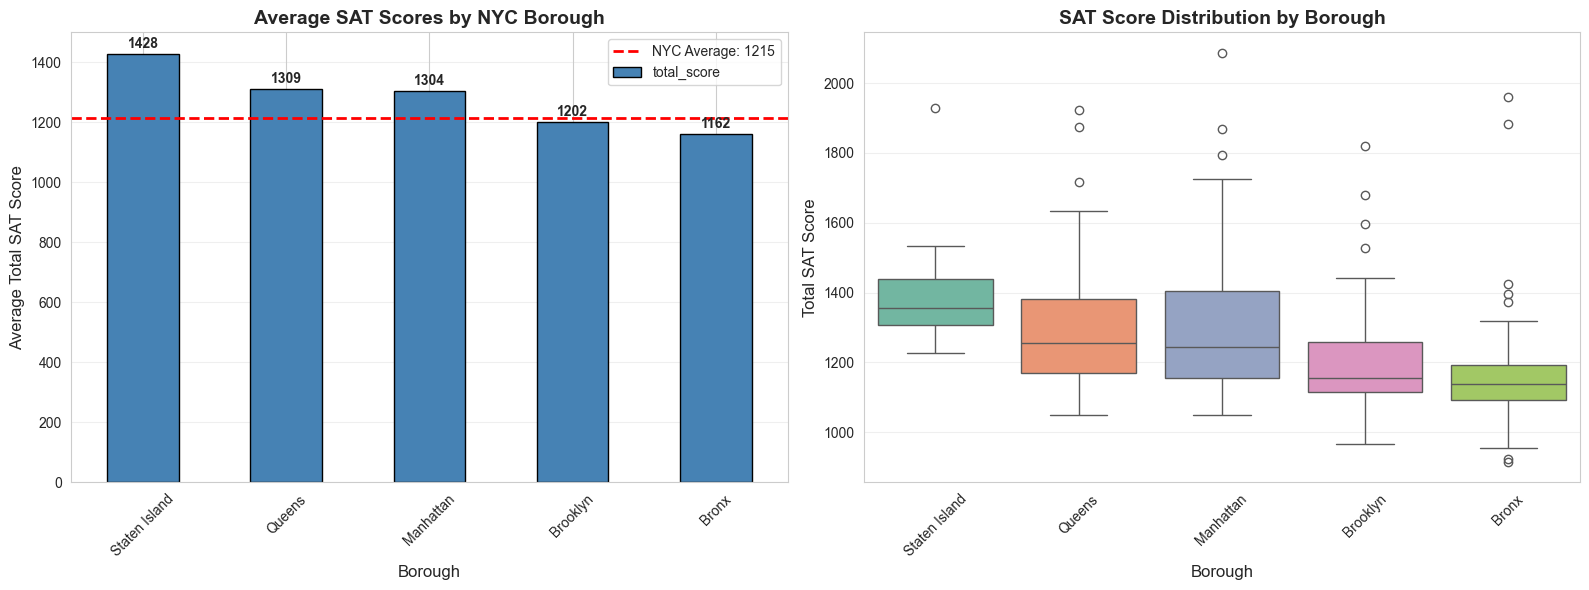

In [15]:
# Visualize borough performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of average scores
borough_scores['total_score'].plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_xlabel('Borough', fontsize=12)
axes[0].set_ylabel('Average Total SAT Score', fontsize=12)
axes[0].set_title('Average SAT Scores by NYC Borough', fontsize=14, fontweight='bold')
axes[0].axhline(merged['total_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'NYC Average: {merged["total_score"].mean():.0f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, (idx, val) in enumerate(borough_scores['total_score'].items()):
    axes[0].text(i, val + 20, f'{val:.0f}', ha='center', fontweight='bold')

# Box plot by borough
merged_clean = merged.dropna(subset=['borough_name', 'total_score'])
borough_order = borough_scores.index.tolist()
sns.boxplot(data=merged_clean, x='borough_name', y='total_score', order=borough_order, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Borough', fontsize=12)
axes[1].set_ylabel('Total SAT Score', fontsize=12)
axes[1].set_title('SAT Score Distribution by Borough', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Test Participation Analysis

In [16]:
# Test taker statistics
print("👥 Test Participation Analysis:\n")
print(f"Average test takers per school: {merged['number_of_test_takers'].mean():.0f}")
print(f"Median: {merged['number_of_test_takers'].median():.0f}")
print(f"Maximum: {merged['number_of_test_takers'].max():.0f}")
print(f"Minimum: {merged['number_of_test_takers'].min():.0f}")

print("\n🏆 Schools with Most Test Takers:\n")
top_participation = merged.nlargest(10, 'number_of_test_takers')[['school_name', 'number_of_test_takers', 'total_score']]
for idx, row in top_participation.iterrows():
    print(f"{row['school_name'][:45]:45s} - {row['number_of_test_takers']:.0f} students (Score: {row['total_score']:.0f})")

👥 Test Participation Analysis:

Average test takers per school: 104
Median: 54
Maximum: 1047
Minimum: 7

🏆 Schools with Most Test Takers:

BROOKLYN TECHNICAL HIGH SCHOOL                - 1047 students (Score: 1821)
FRANCIS LEWIS HIGH SCHOOL                     - 808 students (Score: 1441)
STUYVESANT HIGH SCHOOL                        - 804 students (Score: 2087)
BAYSIDE HIGH SCHOOL                           - 732 students (Score: 1470)
Midwood High School at Brooklyn College       - 725 students (Score: 1527)
TOTTENVILLE HIGH SCHOOL                       - 698 students (Score: 1408)
BENJAMIN CARDOZO HIGH SCHOOL                  - 697 students (Score: 1529)
EDWARD R MURROW HIGH SCHOOL                   - 686 students (Score: 1443)
BRONX HIGH SCHOOL OF SCIENCE                  - 683 students (Score: 1960)
JAMES MADISON HIGH SCHOOL                     - 641 students (Score: 1372)


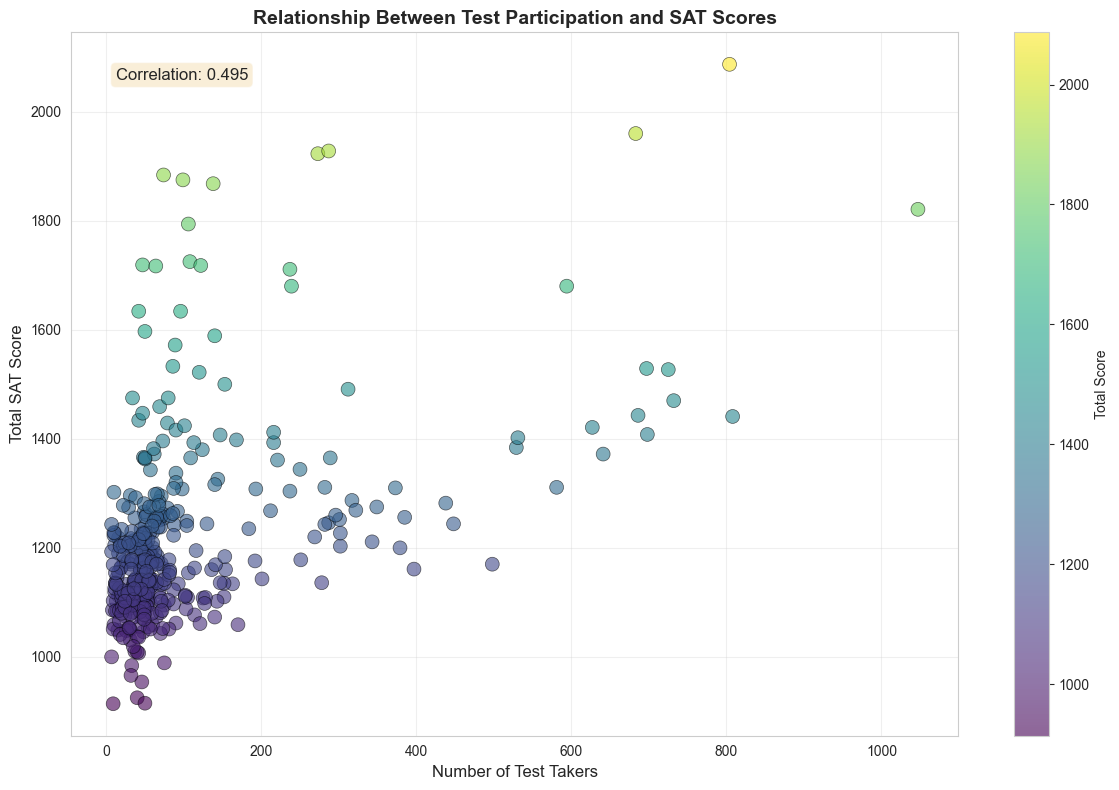


📊 Correlation coefficient: 0.495
   → Moderate correlation: Some relationship between size and performance


In [17]:
# Correlation between participation and scores
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(merged['number_of_test_takers'], merged['total_score'], 
                     alpha=0.6, s=100, c=merged['total_score'], cmap='viridis', edgecolors='black', linewidth=0.5)

ax.set_xlabel('Number of Test Takers', fontsize=12)
ax.set_ylabel('Total SAT Score', fontsize=12)
ax.set_title('Relationship Between Test Participation and SAT Scores', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Total Score', fontsize=10)

# Calculate and display correlation
corr = merged[['number_of_test_takers', 'total_score']].corr().iloc[0, 1]
ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n📊 Correlation coefficient: {corr:.3f}")
if abs(corr) < 0.3:
    print("   → Weak correlation: School size doesn't strongly predict performance")
elif abs(corr) < 0.7:
    print("   → Moderate correlation: Some relationship between size and performance")
else:
    print("   → Strong correlation: School size is a good predictor of performance")

## 8. Performance Categories

In [18]:
# Categorize schools by performance
def categorize_performance(score):
    if pd.isna(score):
        return 'Unknown'
    elif score >= 1500:
        return 'High (1500+)'
    elif score >= 1200:
        return 'Above Average (1200-1499)'
    elif score >= 1000:
        return 'Average (1000-1199)'
    else:
        return 'Below Average (<1000)'

merged['performance_category'] = merged['total_score'].apply(categorize_performance)

# Count schools in each category
category_counts = merged['performance_category'].value_counts()

print("🎯 Performance Categories:\n")
for category, count in category_counts.items():
    pct = count / len(merged) * 100
    print(f"{category:30s}: {count:3d} schools ({pct:5.1f}%)")

🎯 Performance Categories:

Average (1000-1199)           : 220 schools ( 47.8%)
Above Average (1200-1499)     : 133 schools ( 28.9%)
Unknown                       :  74 schools ( 16.1%)
High (1500+)                  :  26 schools (  5.7%)
Below Average (<1000)         :   7 schools (  1.5%)


ValueError: 'explode' must be of length 'x', not 4

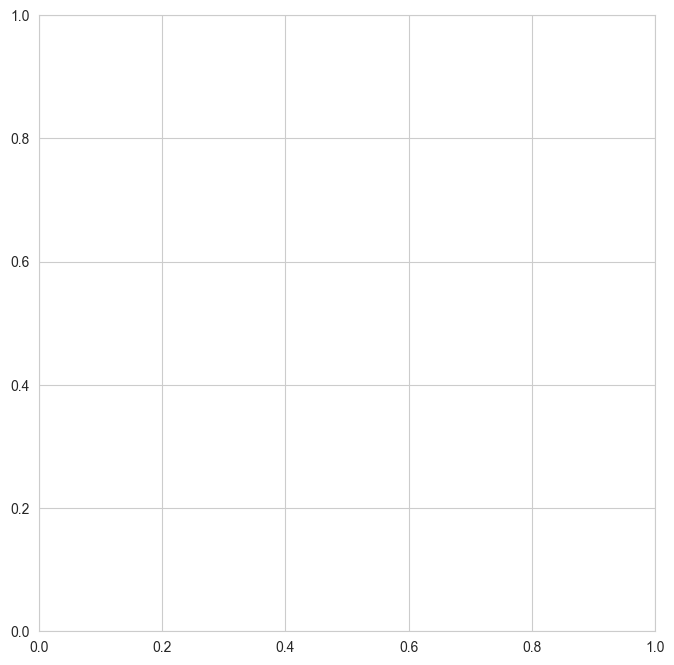

In [19]:
# Pie chart of performance categories
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
                                    startangle=90, colors=colors, explode=explode, shadow=True)

# Beautify text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax.set_title('NYC Schools by Performance Category', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 9. Correlation Matrix

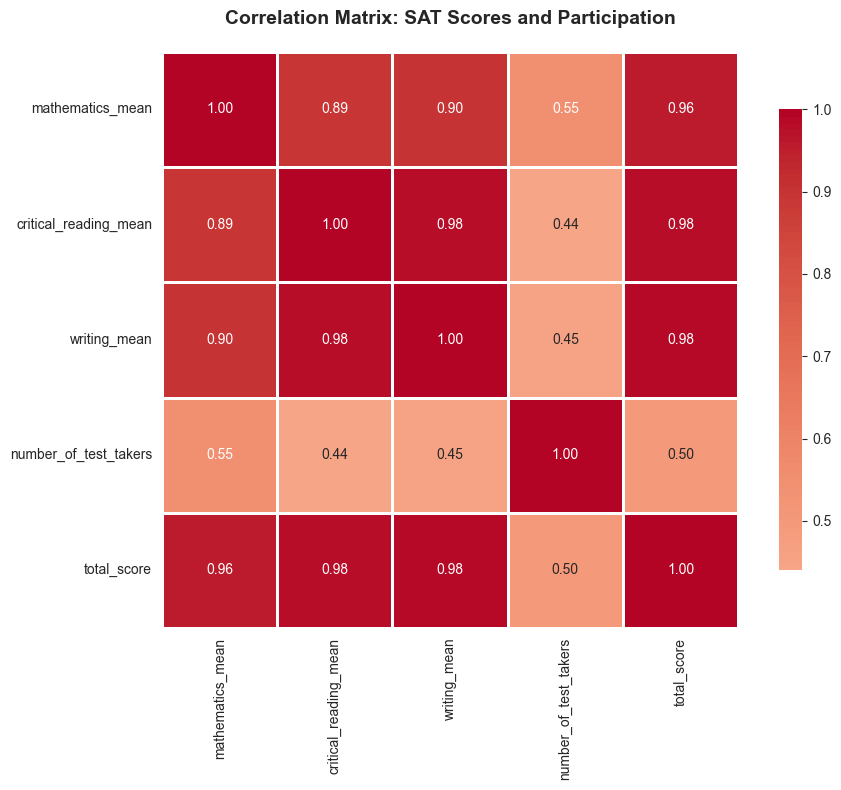


🔍 Key Correlations:
Math vs Reading: 0.894
Math vs Writing: 0.903
Reading vs Writing: 0.978

Test Takers vs Total Score: 0.495


In [20]:
# Correlation between score components
score_cols = ['mathematics_mean', 'critical_reading_mean', 'writing_mean', 'number_of_test_takers', 'total_score']
correlation_matrix = merged[score_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: SAT Scores and Participation', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Key Correlations:")
print(f"Math vs Reading: {correlation_matrix.loc['mathematics_mean', 'critical_reading_mean']:.3f}")
print(f"Math vs Writing: {correlation_matrix.loc['mathematics_mean', 'writing_mean']:.3f}")
print(f"Reading vs Writing: {correlation_matrix.loc['critical_reading_mean', 'writing_mean']:.3f}")
print(f"\nTest Takers vs Total Score: {correlation_matrix.loc['number_of_test_takers', 'total_score']:.3f}")

## 10. Save Analysis Results

In [21]:
# Save the merged and analyzed dataset
save_path = save_csv(merged, "nyc_education_analyzed.csv", subfolder="processed", index=False)
print(f"✅ Analyzed dataset saved to: {save_path}")

# Save top performers
top_schools = merged.nlargest(50, 'total_score')
save_csv(top_schools, "top_50_nyc_schools.csv", subfolder="processed", index=False)
print(f"✅ Top 50 schools saved")

# Save borough summary
borough_summary = merged.groupby('borough_name').agg({
    'school_name': 'count',
    'mathematics_mean': 'mean',
    'critical_reading_mean': 'mean',
    'writing_mean': 'mean',
    'total_score': ['mean', 'median', 'std', 'min', 'max'],
    'number_of_test_takers': 'mean'
}).round(2)

borough_summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in borough_summary.columns]
save_csv(borough_summary, "borough_summary.csv", subfolder="processed")
print(f"✅ Borough summary saved")

print("\n🎉 Analysis complete! All results saved to data/processed/")

✅ Analyzed dataset saved to: c:\git\dbt\data\processed\nyc_education_analyzed.csv
✅ Top 50 schools saved
✅ Borough summary saved

🎉 Analysis complete! All results saved to data/processed/


## 11. Key Findings Summary

In [22]:
print("="*60)
print("🎓 NYC EDUCATION DATA - KEY FINDINGS")
print("="*60)

print("\n📊 Overall Performance:")
print(f"   • Average Total SAT: {merged['total_score'].mean():.0f}")
print(f"   • Top School: {merged.loc[merged['total_score'].idxmax(), 'school_name']} ({merged['total_score'].max():.0f})")
print(f"   • Score Range: {merged['total_score'].min():.0f} - {merged['total_score'].max():.0f}")

print("\n🗽 Borough Rankings (by avg score):")
for i, (boro, score) in enumerate(borough_scores['total_score'].items(), 1):
    print(f"   {i}. {boro:15s}: {score:.0f}")

print("\n🎯 Performance Distribution:")
for category in ['High (1500+)', 'Above Average (1200-1499)', 'Average (1000-1199)', 'Below Average (<1000)']:
    if category in category_counts.index:
        count = category_counts[category]
        pct = count / len(merged) * 100
        print(f"   • {category:30s}: {count:3d} schools ({pct:5.1f}%)")

print("\n🔍 Correlations:")
print(f"   • Strongest: Math ↔ Reading ({correlation_matrix.loc['mathematics_mean', 'critical_reading_mean']:.3f})")
print(f"   • School Size ↔ Performance: {correlation_matrix.loc['number_of_test_takers', 'total_score']:.3f}")

print("\n💡 Insights:")
best_borough = borough_scores['total_score'].idxmax()
worst_borough = borough_scores['total_score'].idxmin()
gap = borough_scores.loc[best_borough, 'total_score'] - borough_scores.loc[worst_borough, 'total_score']
print(f"   • {best_borough} leads with {borough_scores.loc[best_borough, 'total_score']:.0f} avg score")
print(f"   • Achievement gap between boroughs: {gap:.0f} points")
print(f"   • Math scores are {'higher' if merged['mathematics_mean'].mean() > merged['critical_reading_mean'].mean() else 'lower'} than reading on average")

print("\n" + "="*60)
print("✅ Analysis Complete - Ready for Further Exploration!")
print("="*60)

🎓 NYC EDUCATION DATA - KEY FINDINGS

📊 Overall Performance:
   • Average Total SAT: 1215
   • Top School: STUYVESANT HIGH SCHOOL  (2087)
   • Score Range: 914 - 2087

🗽 Borough Rankings (by avg score):
   1. Staten Island  : 1428
   2. Queens         : 1309
   3. Manhattan      : 1304
   4. Brooklyn       : 1202
   5. Bronx          : 1162

🎯 Performance Distribution:
   • High (1500+)                  :  26 schools (  5.7%)
   • Above Average (1200-1499)     : 133 schools ( 28.9%)
   • Average (1000-1199)           : 220 schools ( 47.8%)
   • Below Average (<1000)         :   7 schools (  1.5%)

🔍 Correlations:
   • Strongest: Math ↔ Reading (0.894)
   • School Size ↔ Performance: 0.495

💡 Insights:
   • Staten Island leads with 1428 avg score
   • Achievement gap between boroughs: 266 points
   • Math scores are higher than reading on average

✅ Analysis Complete - Ready for Further Exploration!


## 🎯 Next Steps

1. **Explore Demographics Further**: The demographics dataset has 343 columns! Dive into specific programs, facilities, etc.
2. **Time Series**: Fetch historical SAT data to see trends over time
3. **Predictive Modeling**: Build models to predict scores based on school characteristics
4. **Geographic Analysis**: Plot schools on a map by performance
5. **Compare with Other Data**: Merge with funding, teacher ratios, or other educational metrics

**Want to explore more? Try these commands:**
```python
# See all demographic columns
print(demo.columns.tolist())

# Fetch more education data
!python scripts/list_nyc_education.py

# Explore specific columns
demo[['school_name', 'overview_paragraph', 'ell_programs']].head()
```